In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import shap
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sys import path
import os
for dirname, _, filenames in os.walk('../resources/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath('../'))

from custom import funtions

shap.initjs()
warnings.filterwarnings('ignore')

../resources/allColProSol.xlsx
../resources/dataset_a_2021.csv
../resources/dataset_a_2021v1.xlsx
../resources/dataset_unab_ORIGINAL SIN P1.csv
../resources/dataset_unab_P1.csv
../resources/exitoFallidoEnviosProgramaSol.xlsx
../resources/exitoFallidoProgramaSol.xlsx
../resources/exitosoFallidosEnviosAllColProSol.xlsx
../resources/exitosoFallidosEnviosAllColSol.xlsx
../resources/exitososFallidosEnviosSol.xlsx
../resources/Hito12sinColCeroExitosoFallidosSol.xlsx
../resources/sinColCeroExitosoFallidosEnviosSol.xlsx
../resources/sinColCeroExitosoFallidosSol.xlsx
../resources/v2_hitosExitoFalloColESol1.csv
../resources/v2_hitosExitoFalloColESol1Prograna.csv
../resources/v2_hitosExitoFalloSol1Programa.csv


In [22]:
df = pd.read_csv("../resources/v2_hitosExitoFalloColESol1.csv", delimiter=";", skipinitialspace=True)

In [23]:
# Convertir la columna "sol1" a números de punto flotante
df['sol1'] = df['sol1'].astype(float)
df['exitosos'] = df['exitosos'].astype(int)
df['fallidos'] = df['fallidos'].astype(int)

In [24]:
#creando columna aprobado y con la funcion set_in_aprobado_nota poblamos la nueva columna.
df['aprobado']=df.apply(lambda x: funtions.set_in_aprobado_nota(x['sol1']),axis = 1 )
#revisamos la existencia de la nueva columna.
print(df.columns)

Index(['hito1', 'hito2', 'exitosos', 'fallidos', 'e0', 'e1', 'e2', 'e3', 'e4',
       'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15',
       'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25',
       'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35',
       'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45',
       'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'sol1', 'aprobado'],
      dtype='object')


In [25]:
# Selección de características y variable objetivo
y = df['aprobado']
X = df[
    [
        "exitosos",
        "fallidos",
        "hito1",
        "hito2",
        "e0",
        "e1",
        "e3",
        "e4",
        "e6",
        "e7",
        "e9",
        "e10",
        "e11",
        "e12",
        "e13",
        "e17",
        "e18",
        "e21",
        "e22",
        "e23",
        "e25",
        "e26",
        "e28",
        "e29",
        "e32",
        "e35",
        "e37",
        "e38",
        "e42",
        "e44"
    ]
]

In [26]:
# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [27]:
# arbol de decision
# Explicación de las predicciones utilizando SHAP
# Entrenamiento de los modelos
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

explainer = shap.Explainer(dt)
shap_values = explainer.shap_values(X_test)
#shap.summary_plot(shap_values, X_test)

In [28]:
#Regresion logistica
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Explicación de las predicciones utilizando SHAP
explainer = shap.LinearExplainer(lr, X_train)
shap_values = explainer.shap_values(X_test)
#shap.summary_plot(shap_values, X_test)

In [29]:
#regrecion con bosques aleatorios.
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# Explicación de las predicciones utilizando SHAP
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
#shap.summary_plot(shap_values, X_test)

In [30]:
# Predicciones
pred_lr = lr.predict(X_test)
pred_dt = dt.predict(X_test)
pred_rf = rf.predict(X_test)

In [31]:
# Cálculo de la precisión
accuracy_lr = accuracy_score(y_test, pred_lr)
accuracy_dt = accuracy_score(y_test, pred_dt)
accuracy_rf = accuracy_score(y_test, pred_rf)

In [32]:
precision_lr = precision_score(y_test, pred_lr)
precision_dt = precision_score(y_test, pred_dt)
precision_rf = precision_score(y_test, pred_rf)

In [33]:
recall_lr = recall_score(y_test, pred_lr)
recall_dt = recall_score(y_test, pred_dt)
recall_rf = recall_score(y_test, pred_rf)

In [34]:
f1_lr = f1_score(y_test, pred_lr)
f1_dt = f1_score(y_test, pred_dt)
f1_rf = f1_score(y_test, pred_rf)

# *Comparación de Métricas entre Modelos*

`Accuracy (Precisión)`:
El accuracy, o precisión, es una métrica que mide la proporción de instancias clasificadas correctamente sobre el total de instancias en los datos de prueba. En otras palabras, es la capacidad del modelo para predecir correctamente tanto las instancias positivas como las negativas. Un valor de accuracy alto indica un buen rendimiento general del modelo en la clasificación.
+ `Fórmula:
Accuracy = (Verdaderos Positivos + Verdaderos Negativos) / Total de instancias`

`Precision (Precisión)`:
La precision es una métrica que mide la proporción de instancias clasificadas como positivas que son realmente positivas. Es la capacidad del modelo para evitar hacer falsas afirmaciones de que una instancia pertenece a la clase positiva cuando no lo hace. Una precision alta indica que el modelo tiene una baja tasa de falsos positivos.
+ `Fórmula:
Precision = Verdaderos Positivos / (Verdaderos Positivos + Falsos Positivos)`

`Recall (Recall o Sensibilidad)`:
El recall, también conocido como sensibilidad o tasa de verdaderos positivos, mide la proporción de instancias positivas que son correctamente identificadas por el modelo. Es la capacidad del modelo para detectar y clasificar correctamente las instancias positivas. Un recall alto indica que el modelo tiene una baja tasa de falsos negativos.
+ `Fórmula:
Recall = Verdaderos Positivos / (Verdaderos Positivos + Falsos Negativos)`

`F1 Score`:
El F1 score es una métrica que combina la precision y el recall en una sola medida. Es la media armónica de la precision y el recall, y proporciona una evaluación equilibrada del rendimiento del modelo. El F1 score es especialmente útil cuando hay un desequilibrio entre las clases o cuando se desea tener un equilibrio entre la precision y el recall.
+ `Fórmula:
F1 Score = 2 * (Precision * Recall) / (Precision + Recall)`

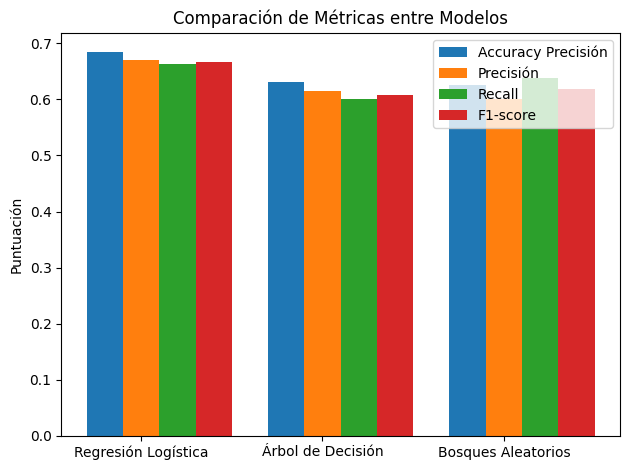

In [35]:
# Creación del gráfico comparativo
models = ['Regresión Logística', 'Árbol de Decisión', 'Bosques Aleatorios']
accuracy = [accuracy_lr, accuracy_dt, accuracy_rf]
precision = [precision_lr, precision_dt, precision_rf]
recall = [recall_lr, recall_dt, recall_rf]
f1_score = [f1_lr, f1_dt, f1_rf]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy Precisión')
rects2 = ax.bar(x, precision, width, label='Precisión')
rects3 = ax.bar(x + width, recall, width, label='Recall')
rects4 = ax.bar(x + 2 * width, f1_score, width, label='F1-score')

ax.set_ylabel('Puntuación')
ax.set_title('Comparación de Métricas entre Modelos')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()

# *Medidas de rendimiento de cada modelo*
`Bias (sesgo)`: El sesgo es la diferencia promedio entre las predicciones del modelo y los valores reales. Un sesgo bajo indica que las predicciones están cercanas al valor real, mientras que un sesgo alto indica que las predicciones tienden a alejarse del valor real.

`MSE (Mean Squared Error) - Error Cuadrático Medio`: Es la media de los errores al cuadrado entre las predicciones y los valores reales. El MSE proporciona una medida de la calidad general del modelo, donde valores más bajos indican que las predicciones se ajustan mejor a los datos reales.

`MAE (Mean Absolute Error) - Error Absoluto Medio`: Es la media de los errores absolutos entre las predicciones y los valores reales. El MAE representa la magnitud promedio de los errores de predicción y se utiliza para evaluar la precisión del modelo. Valores más bajos indican una mejor precisión.

`RMSE (Root Mean Squared Error) - Raíz del Error Cuadrático Medio`: Es la raíz cuadrada del MSE y proporciona una medida del error promedio entre las predicciones y los valores reales. Al igual que el MSE, valores más bajos indican una mejor calidad del modelo.

`R2 (Coeficiente de determinación)`: Es una medida de qué tan bien se ajustan las predicciones del modelo a los datos reales. R2 varía entre 0 y 1, donde 1 indica un ajuste perfecto del modelo a los datos. Un valor más cercano a 1 indica un mejor ajuste del modelo.

En el gráfico de barras, se espera ver las diferentes medidas de rendimiento (bias, mse, mae, rmse, R2) para cada modelo (LM, DT, KNN). Nos ayuda a comparar las barras de cada medida entre los modelos para determinar cuál modelo tiene un mejor rendimiento en términos de sesgo, precisión, ajuste y otros aspectos evaluados por estas medidas.

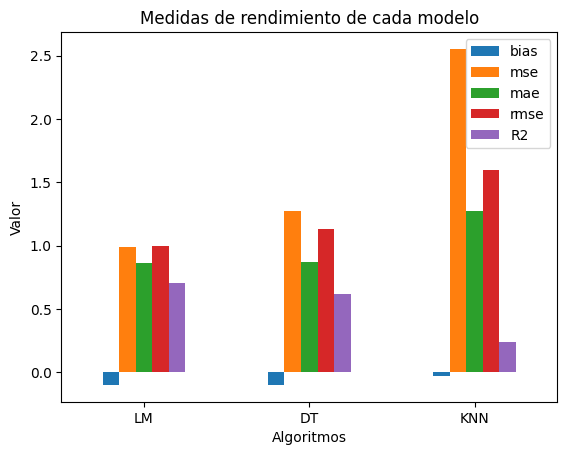

In [36]:
# Dividir los datos en conjuntos de entrenamiento y prueba
np.random.seed(46)
train_indices = np.random.choice(df.index, round(0.8 * len(df)), replace=False)
test_indices = np.setdiff1d(df.index, train_indices)
dat_train = df.iloc[train_indices]
dat_test = df.iloc[test_indices]

# Regresión Lineal Múltiple
lm_model = LinearRegression()
lm_model.fit(dat_train.drop(columns=["sol1"]), dat_train["sol1"])
pred_lm = lm_model.predict(dat_test.drop(columns=["sol1"]))
val_lm = {"bias": np.mean(pred_lm - dat_test["sol1"]),
          "mse": mean_squared_error(dat_test["sol1"], pred_lm),
          "mae": mean_absolute_error(dat_test["sol1"], pred_lm),
          "rmse": np.sqrt(mean_squared_error(dat_test["sol1"], pred_lm)),
          "R2": r2_score(dat_test["sol1"], pred_lm)}

# Árbol de decisión
dt_model = DecisionTreeRegressor()
dt_model.fit(dat_train.drop(columns=["sol1"]), dat_train["sol1"])
pred_dt = dt_model.predict(dat_test.drop(columns=["sol1"]))
val_dt = {"bias": np.mean(pred_dt - dat_test["sol1"]),
          "mse": mean_squared_error(dat_test["sol1"], pred_dt),
          "mae": mean_absolute_error(dat_test["sol1"], pred_dt),
          "rmse": np.sqrt(mean_squared_error(dat_test["sol1"], pred_dt)),
          "R2": r2_score(dat_test["sol1"], pred_dt)}

# K-Vecinos más cercanos
knn_model = KNeighborsRegressor()
knn_model.fit(dat_train.drop(columns=["sol1"]), dat_train["sol1"])
pred_knn = knn_model.predict(dat_test.drop(columns=["sol1"]))
val_knn = {"bias": np.mean(pred_knn - dat_test["sol1"]),
           "mse": mean_squared_error(dat_test["sol1"], pred_knn),
           "mae": mean_absolute_error(dat_test["sol1"], pred_knn),
           "rmse": np.sqrt(mean_squared_error(dat_test["sol1"], pred_knn)),
           "R2": r2_score(dat_test["sol1"], pred_knn)}

# Medidas de rendimiento de cada modelo
all_medR = pd.DataFrame({"Algoritmos": ["LM", "DT", "KNN"],
                         "bias": [val_lm["bias"], val_dt["bias"], val_knn["bias"]],
                         "mse": [val_lm["mse"], val_dt["mse"], val_knn["mse"]],
                         "mae": [val_lm["mae"], val_dt["mae"], val_knn["mae"]],
                         "rmse": [val_lm["rmse"], val_dt["rmse"], val_knn["rmse"]],
                         "R2": [val_lm["R2"], val_dt["R2"], val_knn["R2"]]}).set_index("Algoritmos")

# print(all_medR)

# Gráfico de barras de las medidas de rendimiento
all_medR.plot(kind="bar", rot=0)
plt.xlabel("Algoritmos")
plt.ylabel("Valor")
plt.title("Medidas de rendimiento de cada modelo")
plt.legend(loc="upper right")
plt.show()

# *Comparación de predicciones*

En el gráfico de comparación de predicciones, se muestra cómo se comparan las predicciones de los modelos LM, DT y KNN con los valores observados reales (Obs). Cada línea representa la predicción de un modelo a lo largo del eje de las observaciones (número de observación) y el eje de la variable objetivo (MEDV).

`LM`: Representado por la línea roja en el gráfico. Indica las predicciones del modelo de regresión lineal múltiple (LM). Se espera que las predicciones de LM estén cerca de la línea punteada (color rojo) que representa los valores reales observados. Cuanto más cerca estén las predicciones de LM de la línea punteada, mejor se ajusta el modelo a los datos reales.

`DT`: Representado por la línea rosa en el gráfico. Indica las predicciones del modelo de árbol de decisión (DT). Al igual que con LM, se espera que las predicciones de DT estén cerca de la línea punteada (color rojo) que representa los valores reales observados. Cuanto más cerca estén las predicciones de DT de la línea punteada, mejor se ajusta el modelo a los datos reales.

`KNN`: Representado por la línea verde en el gráfico. Indica las predicciones del modelo de vecinos más cercanos (KNN). Nuevamente, se espera que las predicciones de KNN estén cerca de la línea punteada (color rojo) que representa los valores reales observados. Cuanto más cerca estén las predicciones de KNN de la línea punteada, mejor se ajusta el modelo a los datos reales.

`Obs`: Representado por la línea azul en el gráfico. Indica los valores reales observados. Esta línea punteada (color azul) sirve como referencia para comparar las predicciones de los modelos. Se espera que las predicciones de los modelos estén lo más cerca posible de esta línea, lo que indicaría un buen ajuste del modelo a los datos reales.

Comparando las líneas de predicción de LM, DT y KNN con la línea de observaciones (Obs), se puede determinar cuál modelo se ajusta mejor a los datos reales. Si las líneas de predicción están más cerca de la línea de observaciones, indica un mejor ajuste del modelo y una mayor precisión en las predicciones.

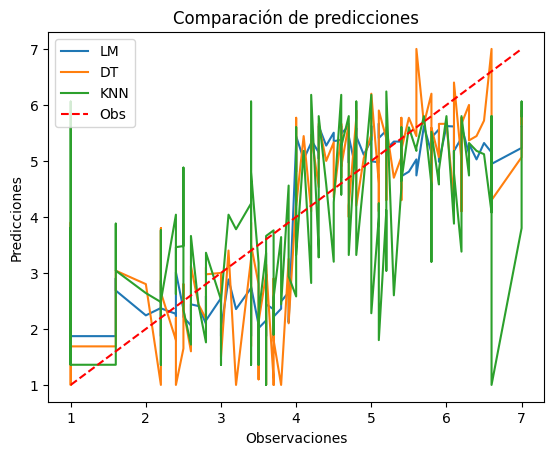

In [37]:
# Gráfico comparativo de predicciones
plt.plot(dat_test["sol1"], pred_lm, label="LM")
plt.plot(dat_test["sol1"], pred_dt, label="DT")
plt.plot(dat_test["sol1"], pred_knn, label="KNN")
plt.plot(dat_test["sol1"], dat_test["sol1"], linestyle="dashed", color="red", label="Obs")
plt.xlabel("Observaciones")
plt.ylabel("Predicciones")
plt.legend()
plt.title("Comparación de predicciones")
plt.show()

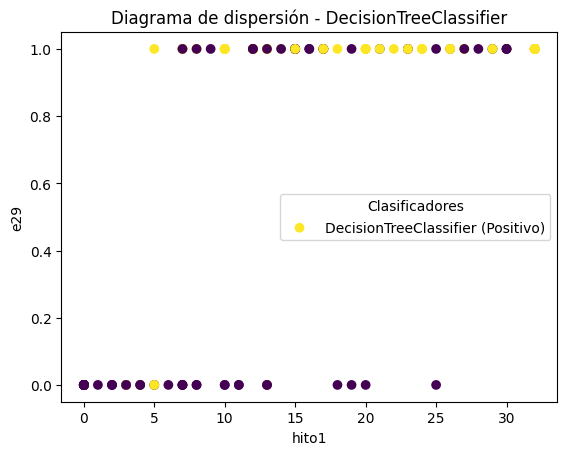

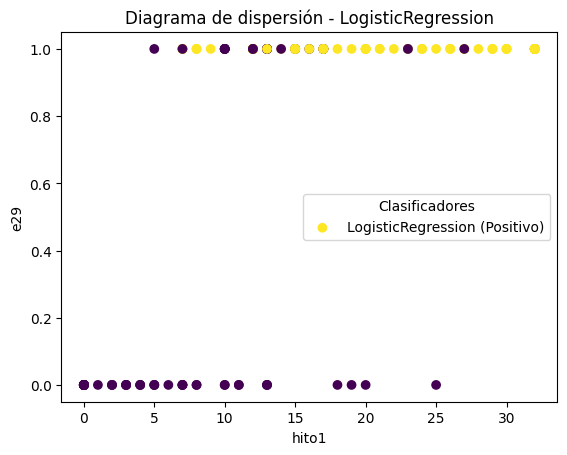

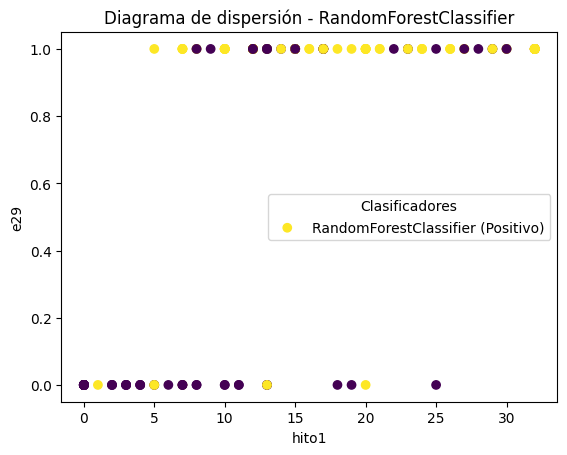

In [38]:
# Diagrama de dispersión independiente
# Entrenar el modelo DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
tree_predictions = tree_model.predict(X_test)

# Crear diagrama de dispersión para DecisionTreeClassifier
plt.scatter(X_test['hito1'], X_test['e29'], c=tree_predictions)
plt.xlabel('hito1')
plt.ylabel('e29')
plt.title('Diagrama de dispersión - DecisionTreeClassifier')

# Crear la leyenda interpretativa
legend_labels = ['DecisionTreeClassifier (Positivo)']
plt.legend(legend_labels, title='Clasificadores', loc='center right')

plt.show()

# Entrenar el modelo LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
logreg_predictions = logreg_model.predict(X_test)

# Crear diagrama de dispersión para LogisticRegression
plt.scatter(X_test['hito1'], X_test['e29'], c=logreg_predictions)
plt.xlabel('hito1')
plt.ylabel('e29')
plt.title('Diagrama de dispersión - LogisticRegression')

# Crear la leyenda interpretativa
legend_labels = ['LogisticRegression (Positivo)']
plt.legend(legend_labels, title='Clasificadores', loc='center right')

plt.show()

# Entrenar el modelo RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
rf_predictions = rf_model.predict(X_test)

# Crear diagrama de dispersión para RandomForestClassifier
plt.scatter(X_test['hito1'], X_test['e29'], c=rf_predictions)
plt.xlabel('hito1')
plt.ylabel('e29')
plt.title('Diagrama de dispersión - RandomForestClassifier')

# Crear la leyenda interpretativa
legend_labels = [ 'RandomForestClassifier (Positivo)']
plt.legend(legend_labels, title='Clasificadores', loc='center right')

plt.show()

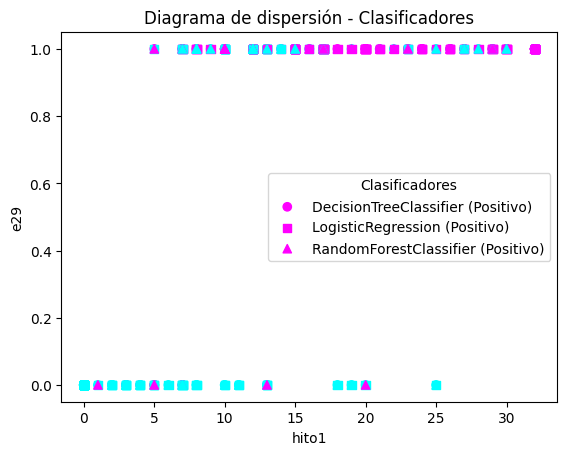

In [39]:
# Diagrama de dispersión agrupado
# Entrenar los modelos
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
tree_predictions = tree_model.predict(X_test)
logreg_predictions = logreg_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)


# Crear el gráfico para los tres clasificadores
plt.scatter(X_test['hito1'], X_test['e29'], c=tree_predictions, marker='o', label='DecisionTreeClassifier', cmap='cool')
plt.scatter(X_test['hito1'], X_test['e29'], c=logreg_predictions, marker='s', label='LogisticRegression', cmap='cool')
plt.scatter(X_test['hito1'], X_test['e29'], c=rf_predictions, marker='^', label='RandomForestClassifier', cmap='cool')

plt.xlabel('hito1')
plt.ylabel('e29')
plt.title('Diagrama de dispersión - Clasificadores')
plt.legend()

# Crear la leyenda interpretativa
legend_labels = ['DecisionTreeClassifier (Positivo)', 'LogisticRegression (Positivo)', 'RandomForestClassifier (Positivo)']
plt.legend(legend_labels, title='Clasificadores', loc='center right')

plt.show()

In [40]:
# DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)
tree_predictions = tree_classifier.predict(X_test)
confusion_matrix_tree = confusion_matrix(y_test, tree_predictions)
print("Matriz de Confusión (DecisionTreeClassifier):")
print(confusion_matrix_tree)

# LogisticRegression
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)
logreg_predictions = logreg_classifier.predict(X_test)
confusion_matrix_logreg = confusion_matrix(y_test, logreg_predictions)
print("Matriz de Confusión (LogisticRegression):")
print(confusion_matrix_logreg)

# RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
confusion_matrix_rf = confusion_matrix(y_test, rf_predictions)
print("Matriz de Confusión (RandomForestClassifier):")
print(confusion_matrix_rf)

Matriz de Confusión (DecisionTreeClassifier):
[[58 30]
 [32 48]]
Matriz de Confusión (LogisticRegression):
[[62 26]
 [27 53]]
Matriz de Confusión (RandomForestClassifier):
[[54 34]
 [29 51]]
